# POLI 175 - Lecture 08

## Regression Analysis

## Plan for today

- Regression in Python:
    + Bivariate models
    + Multivariate models

- Diagnostics of regression estimates

- Best practices

## Data

Today we are going to use the `prestige` dataset.

| **Variable** | **Meaning**                                                                                                                                                        |
|--------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `type`         | Type of occupation. A factor with the following levels: <br>`prof`, professional and managerial; `wc`, white-collar; `bc`, blue-collar.           |
| `income`      | Percentage of occupational incumbents in the 1950 US Census who earned USD 3,500 <br>or more per year (about USD 36,000 in 2017 US dollars).                             |
| `education`    | Percentage of occupational incumbents in 1950 who were high school graduates<br>(which, were we cynical, we would say it is roughly equivalent to a Ph.D. in 2017) |
| `prestige`     | Percentage of respondents in a social survey who rated the occupation as “good” <br>or better in prestige                                                          |
| `profession`   | Name of the profession                                                                                                                                             |


Plus some other `cooked` data.

## Questions

- Quick reminder of a few relevant questions:

    + Is there a relationship between `prestige` and `income`?
    + How strong is the relationship between `prestige` and `income`?
    + Which variables are associated with `prestige`?
    + How can we accurately predict the prestige of professions not studied in this survey?
    + Is the relationship linear?
    + Is there a synergy among predictors?
    
- These are relevant questions, and regression analysis can help us here.

In [31]:
## Loading the data
import pandas as pd
import numpy as np
duncan = pd.read_csv('https://raw.githubusercontent.com/umbertomig/POLI175public/main/data/Duncan.csv')
duncan = duncan.set_index('profession')
duncan.tail()

,type,income,education,prestige
profession,,,,
soda.clerk,bc,12,30,6
watchman,bc,17,25,11
janitor,bc,7,20,8
policeman,bc,34,47,41
waiter,bc,8,32,10


## Regression

- There are two packages in Python to run Regression:
    + `statsmodels`
    + `scikit.learn`

- Today we are going to study the `statsmodels`

## Bivariate Regression

This regression is in the form of 

$$ Y = \beta_0 + \beta_1X_1 + \varepsilon $$

We need to load a few packages:

In [2]:
## Loading Libraries and Modules
# Running the regression:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Plotting things:
import seaborn as sns
import matplotlib.pyplot as plt

## Running a Bivariate Regression

- Intuitively, earning more `income` is probably a good predictor of `prestige`. We can check that!

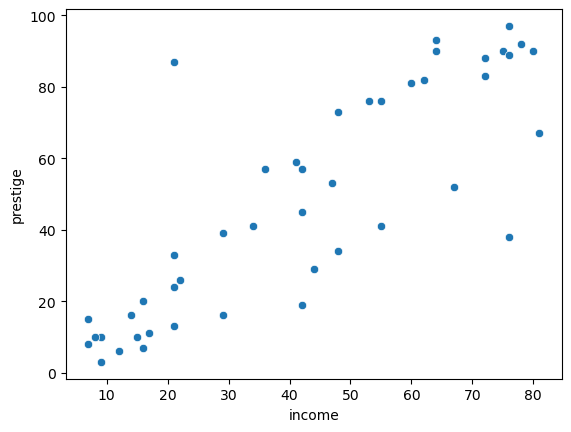

In [3]:
# Scatterplot:
sns.scatterplot(x = 'income', y = 'prestige', data = duncan)
plt.show()

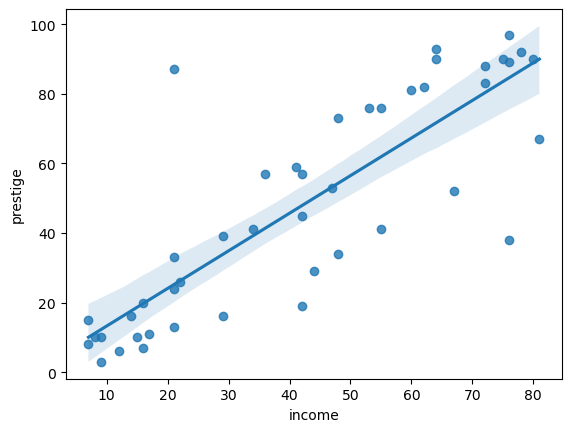

In [4]:
# Regplot:
sns.regplot(x = 'income', y = 'prestige', data = duncan)
plt.show()

In [5]:
## Now running the actual regression:

# Create the model.Fit the model
model = ols('prestige ~ income', data = duncan).fit()

# Print the parameters
print(model.params)

Intercept    2.456574
income       1.080390
dtype: float64


Meaning:

$$ \text{prestige} \ \approx \ 2.46 + 1.08 \times \text{income} $$

## Regression

- Relevant Questions:
    + *Is there a relationship between `prestige` and `income`?*
        + Yes! But not sure yet if `statistically significant` or not...
    + *How strong is the relationship between `prestige` and `income`?*
        + When we increase the income by one unit (which is a percentage of people earning more than 39k in the profession), we increase the prestige **on average** by 1.08 units.
        
- How about statistical significance? Let's test it!

In [6]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     101.3
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           7.14e-13
Time:                        15:36:27   Log-Likelihood:                -191.38
No. Observations:                  45   AIC:                             386.8
Df Residuals:                      43   BIC:                             390.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4566      5.190      0.473      0.6

## Regression

- Relevant Questions:
    + *Is there a relationship between `prestige` and `income`?*
        + Yes! It is statistically significant at a level lower than 0.001!
    + *How strong is the relationship between `prestige` and `income`?*
        + When we increase the income by one unit (which is a percentage of people earning more than 39k in the profession), we increase the prestige **on average** by 1.08 units.
        
- How accurate is our overall model?
    + Let's check the R$^2$ and the Residual Standard Error (RSE)

In [7]:
# R-squared
rsq = model.rsquared
print(rsq) 

# Around 70% of the variation of prestige is explained by income

0.701911139847978


In [8]:
# Mean Squared Error
mse = model.mse_resid
print('The mean squared error: ' + str(mse))

# Residual Standard Error
rse = np.sqrt(mse)
print('The Residual Standard Error: ' + str(rse))

# The "typical" distance between the predicted and the observed values is 17.4 prestige points

The mean squared error: 302.855817097006
The Residual Standard Error: 17.402753147045615


## Diagnostics

- The fit seem to be good.

- But if you think about it, we still have many questions about our model.
    + Is it linear?
    + Can we do better than the bivariate model?
    + Are the standard errors well-defined?
    + And others...
    
- Here we are going to see how to diagnose some of these problems.

## Diagnostics

Several plots can help us diagnose the quality of our model.

**Warning**: Find and analyzing these violations is **more of an art**.

- In any case, be mindful that a careful analysis is frequent enough to ensure you have a `good` model.

- We are going to look at some of them, that make sense for the bivariate case. 

- Later we are going to look at the ones that make sense for the multivariate case.

### Non-linearity

When the relationship is non-linear, you could have done better using a different (more flexible) functional form.

The plot to detect this is residual in the y-axis against the fitted values in the x-axis:

![reg](../img/fig5.png)

- Plot: Fitted Values x Raw Residuals

- The best: You should find no patterns.

- The ugly: A discernible pattern tells you that you could have done better with a more flexible model.

### Non-linearity

- Hint: Look at the smoothing trend line (the `lowess`). You should see no discernible trend.

For the `prestige` x `income` relationship:

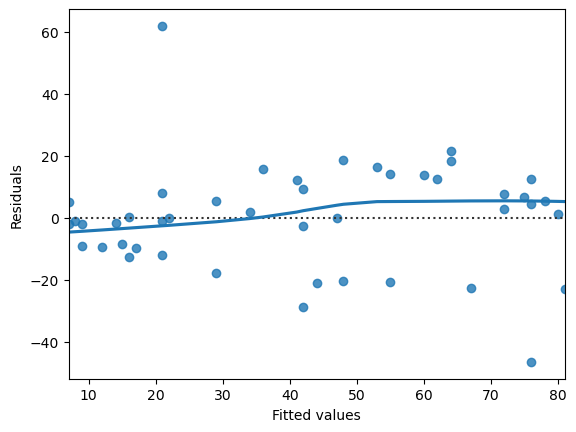

In [9]:
# Residual x fitted values (linearity + heteroscedasticity)
sns.residplot(x = 'income', y = 'prestige', data = duncan, lowess = True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

### Non-linearity

- Let's `cook` a non-linear relation:

- I will cook the following:

$$ Y = 2 + 3 X - 2 X^2 + \varepsilon $$

- The relationship is obviously non-linear.

In [10]:
## Cooking
cooked_data = pd.DataFrame({
    'x': np.random.normal(0, 1, 100)
})
cooked_data['y'] = 2 + 3 * cooked_data['x'] - 2 * (cooked_data['x'] ** 2) + np.random.normal(0, 1, 100)
## Fitting
model2 = ols('y ~ x', data = cooked_data).fit()

## Checking
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     52.88
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           8.75e-11
Time:                        15:36:27   Log-Likelihood:                -245.55
No. Observations:                 100   AIC:                             495.1
Df Residuals:                      98   BIC:                             500.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0265      0.289      0.092      0.9

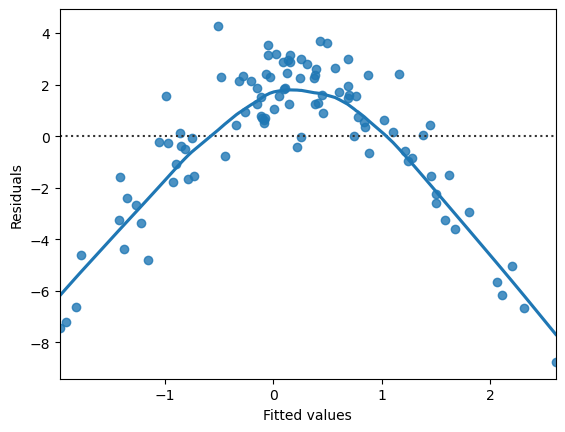

In [11]:
# Residual x fitted values (linearity + heteroscedasticity)
sns.residplot(x = 'x', y = 'y', data = cooked_data, lowess = True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

### Heteroscedasticity

- It is fancy wording to say that the variance in error is not constant.

- It usually means that you are better at fitting some range of the predictors than others.

![reg](../img/fig7.png)

- Plot: Fitted Values x Raw Residuals

- The best: You should find no patterns.

- The ugly: A funnel-shaped figure tells you that you may have heteroscedasticity. It invalidates your standard errors.

### Heteroscedasticity

- Hint: Look at the "shape" of the data cloud. You should see no discernible "shape."

For the `prestige` x `income` relationship:

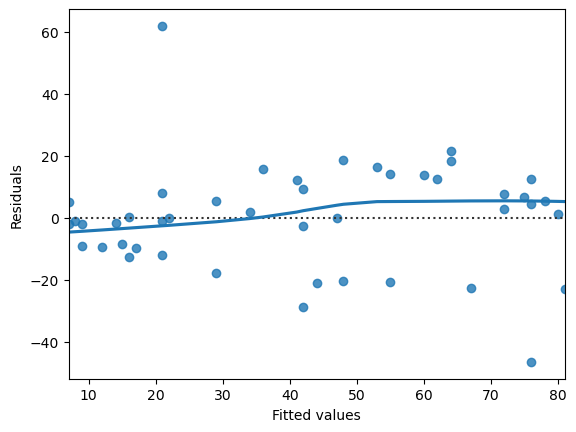

In [12]:
# Residual x fitted values (linearity + heteroscedasticity)
sns.residplot(x = 'income', y = 'prestige', data = duncan, lowess = True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

### Outliers

- Outliers are values very far away from most values predicted by the model.

- Sometimes, it is correct, but frequently it may tell you that you made a mistake in collecting the data!

![reg](../img/fig8.png)

- Plot: Fitted x Studentized residuals

- The best: You should find no extreme values in the plot.

- The ugly: An extreme value can affect your RSE, $R^2$, and messes up with p-values.

In [13]:
## More technical info about the model
summary_info = model.get_influence().summary_frame()
summary_info.head()

,dfb_Intercept,dfb_income,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
profession,,,,,,,,
accountant,-0.024666,0.092647,0.010587,0.735665,0.037652,0.145515,0.731680,0.144726
pilot,-0.014356,0.030852,0.000800,0.163026,0.056785,0.040001,0.161169,0.039545
architect,-0.040598,0.080937,0.005119,0.386908,0.064010,0.101180,0.383050,0.100171
author,0.003607,0.067444,0.010049,0.823419,0.028788,0.141765,0.820281,0.141224
chemist,-0.048329,0.150817,0.024828,1.079507,0.040869,0.222836,1.081638,0.223276


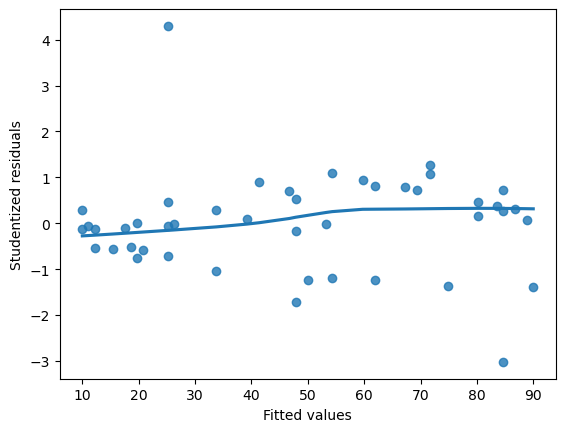

In [14]:
# Checking the Studentized Residuals
summary_info['fittedvalues'] = model.fittedvalues
sns.regplot(x = 'fittedvalues', y = 'student_resid', data = summary_info, lowess = True)
plt.xlabel("Fitted values")
plt.ylabel("Studentized residuals")
plt.show()

In [15]:
# Checking the Studentized Residuals
print(summary_info[['student_resid', 'fittedvalues']].sort_values('student_resid', ascending = False).head())

# Checking the Studentized Residuals
print(summary_info[['student_resid', 'fittedvalues']].sort_values('student_resid', ascending = False).tail())

            student_resid  fittedvalues
profession                             
minister         4.299856     25.144758
professor        1.264232     71.601514
teacher          1.088938     54.315279
chemist          1.081638     71.601514
contractor       0.947376     59.717227
                    student_resid  fittedvalues
profession                                     
plumber                 -1.227244     49.993720
reporter                -1.357144     74.842683
RR.engineer             -1.391264     89.968138
streetcar.motorman      -1.712784     47.832941
conductor               -3.019729     84.566190


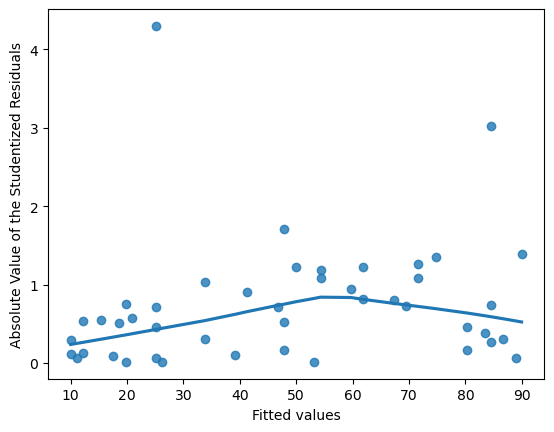

In [16]:
# Checking the Absolute Value of the Studentized Residuals
summary_info['abs_student_resid'] = np.abs(summary_info['student_resid'])
sns.regplot(x = 'fittedvalues', y = 'abs_student_resid', data = summary_info, lowess = True)
plt.xlabel("Fitted values")
plt.ylabel("Absolute Value of the Studentized Residuals")
plt.show()

In [17]:
# Checking the Absolute Value of the Studentized Residuals
summary_info.sort_values('abs_student_resid', ascending = False).head()

,dfb_Intercept,dfb_income,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits,fittedvalues,abs_student_resid
profession,,,,,,,,,,
minister,0.815826,-0.564624,0.265244,3.625357,0.038796,0.728346,4.299856,0.863855,25.144758,4.299856
conductor,0.337190,-0.658212,0.273524,-2.769568,0.066571,-0.739626,-3.019729,-0.806433,84.566190,3.019729
streetcar.motorman,-0.127833,-0.001425,0.031903,-1.675526,0.022223,-0.252599,-1.712784,-0.258216,47.832941,1.712784
RR.engineer,0.195291,-0.350303,0.082942,-1.376371,0.080515,-0.407288,-1.391264,-0.411695,89.968138,1.391264
reporter,0.083088,-0.215488,0.043817,-1.344051,0.046267,-0.296031,-1.357144,-0.298915,74.842683,1.357144


### High Leverage

- Have very unusual $x_i$ values that could potentially tilt the regression line towards them.

- **If high leverage and outlier, bad combination!**

![reg](fig9.png)

- Plot: Leverage x Studentizided residuals

- The best: You should find no extreme values in the plot.

- The ugly: An extreme value can affect your fit.

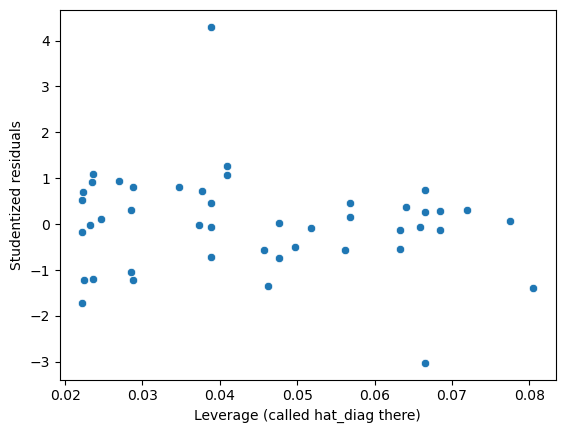

In [18]:
## Checking the Leverage
sns.scatterplot(x = 'hat_diag', y = 'student_resid', data = summary_info)
plt.xlabel("Leverage (called hat_diag there)")
plt.ylabel("Studentized residuals")
plt.show()

In [19]:
summary_info.sort_values('hat_diag', ascending = False).head()

,dfb_Intercept,dfb_income,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits,fittedvalues,abs_student_resid
profession,,,,,,,,,,
RR.engineer,0.195291,-0.350303,0.082942,-1.376371,0.080515,-0.407288,-1.391264,-0.411695,89.968138,1.391264
dentist,-0.008852,0.016111,0.000186,0.066546,0.077574,0.019298,0.065771,0.019073,88.887749,0.065771
banker,-0.038302,0.072014,0.003833,0.314521,0.071920,0.087555,0.311200,0.086631,86.726969,0.311200
coal.miner,0.079282,-0.065387,0.003233,0.296538,0.068497,0.080412,0.293370,0.079553,10.019302,0.293370
janitor,-0.032115,0.026487,0.000531,-0.120224,0.068497,-0.032601,-0.118838,-0.032225,10.019302,0.118838


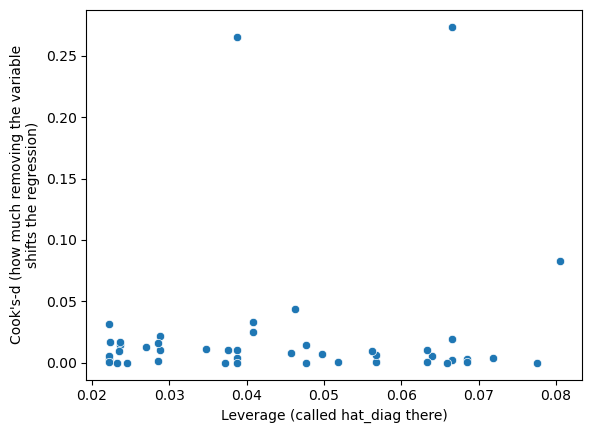

In [20]:
## Checking the Leverage and Outliers: Cook's-d x Leverage
sns.scatterplot(x = 'hat_diag', y = 'cooks_d', data = summary_info)
plt.xlabel("Leverage (called hat_diag there)")
plt.ylabel("Cook's-d (how much removing the variable\nshifts the regression)")
plt.show()

In [21]:
# Checking the Cook's-d measure
summary_info.sort_values('cooks_d', ascending = False).head()

,dfb_Intercept,dfb_income,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits,fittedvalues,abs_student_resid
profession,,,,,,,,,,
conductor,0.337190,-0.658212,0.273524,-2.769568,0.066571,-0.739626,-3.019729,-0.806433,84.566190,3.019729
minister,0.815826,-0.564624,0.265244,3.625357,0.038796,0.728346,4.299856,0.863855,25.144758,4.299856
RR.engineer,0.195291,-0.350303,0.082942,-1.376371,0.080515,-0.407288,-1.391264,-0.411695,89.968138,1.391264
reporter,0.083088,-0.215488,0.043817,-1.344051,0.046267,-0.296031,-1.357144,-0.298915,74.842683,1.357144
professor,-0.056487,0.176277,0.033585,1.255527,0.040869,0.259171,1.264232,0.260968,71.601514,1.264232


## Multiple Linear Regression

- So far:
    + Is there a relationship between `prestige` and `income`? **Yes**
    + How strong is the relationship between `prestige` and `income`? **Yes**
    + Which variables are associated with `prestige`?
    + How can we accurately predict the prestige of professions not studied in this survey? **Yes, so far...**
    + Is the relationship linear? **Yes, so far...**
    + Is there a synergy among predictors?
    
- Can we do better? **Yes**, we have other predictors that we didn't not explore.

## Multiple Linear Regression

Let's fit the following model:

$$ \text{prestige} = \beta_0 + \beta_1\text{income} + \beta_2\text{education} + \varepsilon $$

In [22]:
## Running the actual regression:

# Create the model.Fit the model
model3 = ols('prestige ~ income + education', data = duncan).fit()

# Print the parameters
print(model3.params)

Intercept   -6.064663
income       0.598733
education    0.545834
dtype: float64


Meaning:

$$ \text{prestige} \ \approx \ -6.06 + 0.60\text{income} + 0.55\text{education} $$

## F-Statistic

Are we doing better than the linear regression? We can test that!

**Null hypothesis:** The model with fewer parameters is better.

**Alternative hypothesis:** At least one variable in the new model does well.

In [23]:
## Anova for model without x model with education
anova_lm(model, model3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,43.0,13022.800135,0.0,NaN,NaN,NaN
1,42.0,7506.698653,1.0,5516.101482,30.862603,0.000002


## RSE and R$^2$

We can also look at the Residual Standard Error and the R$^2$ to determine this:

In [24]:
# Model with only income
mse = model.mse_resid
print('The mean squared error: ' + str(mse))

# Residual Standard Error
rse = np.sqrt(mse)
print('The Residual Standard Error: ' + str(rse))

# R-squared
rsq = model.rsquared
print(rsq)

The mean squared error: 302.855817097006
The Residual Standard Error: 17.402753147045615
0.701911139847978


In [25]:
# Model with income and education
mse = model3.mse_resid
print('The mean squared error: ' + str(mse))

# Residual Standard Error
rse = np.sqrt(mse)
print('The Residual Standard Error: ' + str(rse))

# R-squared
rsq = model3.rsquared
print(rsq)

The mean squared error: 178.7309203117738
The Residual Standard Error: 13.3690283981961
0.8281734172543814


## Diagnostics

Besides the diagnostics that we run before, we can check something called *multicollinearity*

### Multicollinearity

- Multicollinearity is a situation when your predictors are highly correlated.

- In extreme cases, it messes up with the computations in your model.

![reg](fig10.png)

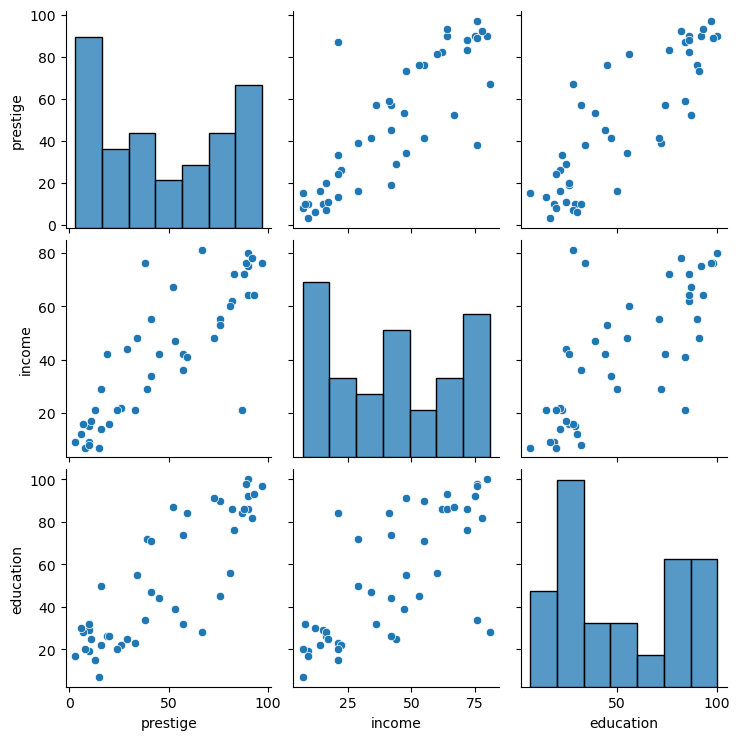

In [26]:
## Pairplot to check
sns.pairplot(duncan[['prestige', 'income', 'education']])
plt.show()

### Multicollinearity

- One measure of multicollinearity is the *Variance Inflation Factor*.
    + How much the multicollinearity is messing up with the estimates.
    
- To compute, it is fairly easy. As a rule-of-thumb, we would like to see values lower than 5.

- It is rarely a problem, though... Especially with large datasets.

In [27]:
## VIF
variables = duncan[['income', 'education']]
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif 

[7.681386643382841, 7.681386643382841]

## Deciding on important variables

- Several criteria can be used. We will discuss later their trade-offs.

- But we have a couple of automated ways to select them that are easier to implement:

1. **Forward selection**:
    + Start with the null model and fit $p$ regressions for each predictor. 
    + Add to the model the variable that results in the lowest RSS.
    + Repeat until some stopping rule is satisfied.


#### Deciding on important variables

2. **Backward selection**:
    + Start with the full model, with all $p$ predictors. 
    + Remove the variable with the lowest p-value.
    + Fit the new model with p-1 variables.
    + Repeat until some stopping rule is satisfied.

#### Deciding on important variables

3. **Mixed selection**:
    + Start with the null model and fit $p$ regressions for each predictor.
    + Add to the model the variable that results in the lowest RSS.
    + Look at the p-value and remove it if it drops under a certain threshold.
    + Repeat until some stopping rule is satisfied.


## Application

- So far:
    + Is there a relationship between `prestige` and `income`? **Yes**
    + How strong is the relationship between `prestige` and `income`? **Yes**
    + Which variables are associated with `prestige`? **income, education, others?**
    + How can we accurately predict the prestige of professions not studied in this survey? **Yes**
    + Is the relationship linear? **It seems so**
    + Is there a synergy among predictors? **Good question: for PS2!**
    
- PS2 we are going to expand the study here to the other covariate, the `type` of the job. 
    + Note that it is a qualitative covariate!

# Questions?

# See you next class
